In [4]:
# import pandas as pd
import requests
import geopandas as gp
import matplotlib.pyplot as plt

In [7]:
# Open the file 'api_key.txt' in read mode
with open('api_key.txt', 'r') as file:
    # Read the first line and store it into the variable API_KEY
    API_KEY = file.readline().strip()

# You can print out the API_KEY to check if it's correct (optional)
# print(API_KEY)


In [9]:
# Replace 'YOUR_API_KEY' with your actual Census API key.
# Set up the request URL for the American Community Survey 5-Year Data


'''
found url here

https://api.census.gov/data/2022/acs/acs5/examples.html


'''
url = f'https://api.census.gov/data/2022/acs/acs5?get=NAME,B01001_001E&for=block%20group:*&in=state:44&in=county:*&in=tract:*&key={API_KEY}'

response = requests.get(url)

data = response.json()

# Convert to DataFrame, setting the first row as header
pop_data1 = gp.GeoDataFrame(data[1:], columns=data[0])
# pop_data1 = pop_data1.sort_values(by='tract')

In [185]:
pop_data1

NAME B01001_001E state  \
0    Block Group 1; Census Tract 301; Bristol Count...        1276    44   
1    Block Group 2; Census Tract 301; Bristol Count...         958    44   
2    Block Group 3; Census Tract 301; Bristol Count...        1234    44   
3    Block Group 4; Census Tract 301; Bristol Count...        1300    44   
4    Block Group 1; Census Tract 302; Bristol Count...         865    44   
..                                                 ...         ...   ...   
787  Block Group 2; Census Tract 515.04; Washington...        1598    44   
788  Block Group 3; Census Tract 515.04; Washington...         887    44   
789  Block Group 4; Census Tract 515.04; Washington...        1142    44   
790  Block Group 0; Census Tract 9901; Washington C...           0    44   
791  Block Group 0; Census Tract 9902; Washington C...           0    44   

    county   tract block group  
0      001  030100           1  
1      001  030100           2  
2      001  030100           3  
3      001  030100           4  
4      001  030200           1  
..     ...     ...         ...  
787    009  051504           2  
788    009  051504           3  
789    009  051504           4  
790    009  990100           0  
791    009  990200           0  

[792 rows x 6 columns]

In [187]:
'''
shapefile of block groups downloaded from
https://www.census.gov/cgi-bin/geo/shapefiles/index.php

select block group from dropdown, then rhode island.

effective as of march 12, 2024

'''


ri_blkgrp_shp = gp.read_file('./tl_2023_44_bg/tl_2023_44_bg.shp')
# ri_blkgrp_shp = ri_blkgrp_shp.sort_values(by='TRACTCE')
ri_blkgrp_shp.head()

STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID                GEOIDFQ  \
0      44      009  050500        2  440090505002  1500000US440090505002   
1      44      009  050103        2  440090501032  1500000US440090501032   
2      44      009  050500        3  440090505003  1500000US440090505003   
3      44      009  050901        1  440090509011  1500000US440090509011   
4      44      009  050500        1  440090505001  1500000US440090505001   

        NAMELSAD  MTFCC FUNCSTAT     ALAND   AWATER     INTPTLAT  \
0  Block Group 2  G5030        S  53127699  1433988  +41.5756237   
1  Block Group 2  G5030        S  13280651  2404539  +41.6043094   
2  Block Group 3  G5030        S  50845211   596678  +41.5826523   
3  Block Group 1  G5030        S   6664287   194296  +41.4089580   
4  Block Group 1  G5030        S  44831532   380744  +41.5289782   

       INTPTLON                                           geometry  
0  -071.7343626  POLYGON ((-71.79139 41.54638, -71.79139 41.546...  
1  -071.4270981  POLYGON ((-71.48047 41.60232, -71.48006 41.603...  
2  -071.5929171  POLYGON ((-71.68166 41.57505, -71.68158 41.575...  
3  -071.8210076  POLYGON ((-71.84359 41.40533, -71.84338 41.405...  
4  -071.5611289  POLYGON ((-71.62072 41.56423, -71.61942 41.563...

In [192]:
ri_2merge = gp.GeoDataFrame.merge(pop_data1,ri_blkgrp_shp,
                                  how='inner',
                                  left_on=['tract','block group'],
                                  right_on=['TRACTCE','BLKGRPCE'])

ri_2merge.set_geometry('geometry')

NAME B01001_001E state  \
0    Block Group 1; Census Tract 301; Bristol Count...        1276    44   
1    Block Group 2; Census Tract 301; Bristol Count...         958    44   
2    Block Group 3; Census Tract 301; Bristol Count...        1234    44   
3    Block Group 4; Census Tract 301; Bristol Count...        1300    44   
4    Block Group 1; Census Tract 302; Bristol Count...         865    44   
..                                                 ...         ...   ...   
787  Block Group 2; Census Tract 515.04; Washington...        1598    44   
788  Block Group 3; Census Tract 515.04; Washington...         887    44   
789  Block Group 4; Census Tract 515.04; Washington...        1142    44   
790  Block Group 0; Census Tract 9901; Washington C...           0    44   
791  Block Group 0; Census Tract 9902; Washington C...           0    44   

    county   tract block group STATEFP COUNTYFP TRACTCE BLKGRPCE  \
0      001  030100           1      44      001  030100        1   
1      001  030100           2      44      001  030100        2   
2      001  030100           3      44      001  030100        3   
3      001  030100           4      44      001  030100        4   
4      001  030200           1      44      001  030200        1   
..     ...     ...         ...     ...      ...     ...      ...   
787    009  051504           2      44      009  051504        2   
788    009  051504           3      44      009  051504        3   
789    009  051504           4      44      009  051504        4   
790    009  990100           0      44      009  990100        0   
791    009  990200           0      44      009  990200        0   

            GEOID                GEOIDFQ       NAMELSAD  MTFCC FUNCSTAT  \
0    440010301001  1500000US440010301001  Block Group 1  G5030        S   
1    440010301002  1500000US440010301002  Block Group 2  G5030        S   
2    440010301003  1500000US440010301003  Block Group 3  G5030        S   
3    440010301004  1500000US440010301004  Block Group 4  G5030        S   
4    440010302001  1500000US440010302001  Block Group 1  G5030        S   
..            ...                    ...            ...    ...      ...   
787  440090515042  1500000US440090515042  Block Group 2  G5030        S   
788  440090515043  1500000US440090515043  Block Group 3  G5030        S   
789  440090515044  1500000US440090515044  Block Group 4  G5030        S   
790  440099901000  1500000US440099901000  Block Group 0  G5030        S   
791  440099902000  1500000US440099902000  Block Group 0  G5030        S   

       ALAND     AWATER     INTPTLAT      INTPTLON  \
0    1475125          0  +41.7548932  -071.3354602   
1     913784     103959  +41.7408466  -071.3355372   
2    1058810    2418973  +41.7403251  -071.3469110   
3     867517     171459  +41.7520835  -071.3459600   
4    2026523     407642  +41.7593931  -071.3256026   
..       ...        ...          ...           ...   
787  2225645     772280  +41.3826993  -071.4780723   
788  2107258    1868026  +41.3904184  -071.4983265   
789  5218683    1907414  +41.4137208  -071.4867907   
790        0  268719940  +41.3436853  -071.6552749   
791        0  251843080  +41.1453798  -071.5273593   

                                              geometry  
0    POLYGON ((-71.34223 41.75908, -71.34211 41.759...  
1    POLYGON ((-71.34147 41.74519, -71.34148 41.745...  
2    POLYGON ((-71.36521 41.73565, -71.36020 41.738...  
3    POLYGON ((-71.35579 41.74541, -71.35564 41.745...  
4    POLYGON ((-71.33266 41.76572, -71.33200 41.766...  
..                                                 ...  
787  POLYGON ((-71.48869 41.37645, -71.48869 41.376...  
788  POLYGON ((-71.51452 41.38491, -71.50839 41.399...  
789  POLYGON ((-71.50685 41.40280, -71.50506 41.406...  
790  POLYGON ((-71.90722 41.30454, -71.90711 41.304...  
791  POLYGON ((-71.67881 41.15891, -71.67626 41.168...  

[792 rows x 20 columns]

In [237]:
'''
municipal boundaries obtained through rigis

https://www.rigis.org/datasets/municipalities-1997

'''


ri_towns_shp = gp.read_file('./muni97d/muni97d.shp')
ri_towns_shp.head()

AREA      PERIMETER  RITOWN5K_  RITOWN5K_I              NAME  MCD  \
0  7.887697e+08  134174.188249          2         380        CUMBERLAND   20   
1  2.198877e+08   61203.977616          3           1        WOONSOCKET   80   
2  6.936611e+08  122732.512715          4           2  NORTH SMITHFIELD   55   
3  1.588026e+09  166984.851549          5           3      BURRILLVILLE    5   
4  5.275620e+08  117805.337135          6         381           LINCOLN   45   

   CFIPS      COUNTY  OSP  CFIPS_MCD TWNCODE LAND  \
0      7  PROVIDENCE    8       7020      CU    Y   
1      7  PROVIDENCE   39       7080      WO    Y   
2      7  PROVIDENCE   25       7055      NS    Y   
3      7  PROVIDENCE    3       7005      BU    Y   
4      7  PROVIDENCE   17       7045      LI    Y   

                                            geometry  
0  POLYGON ((339469.656 340510.438, 339481.438 34...  
1  POLYGON ((320285.094 339477.031, 320490.656 33...  
2  POLYGON ((299086.656 338867.188, 299412.812 33...  
3  POLYGON ((303493.281 310061.406, 303372.875 31...  
4  POLYGON ((331461.675 320529.942, 331441.217 32...

<Axes: >

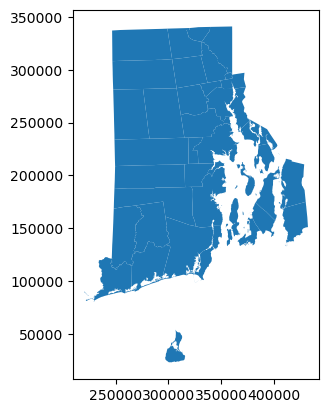

In [238]:
ri_towns_shp.plot()

In [198]:
new_gdf = ri_2merge[['B01001_001E', 'tract', 'block group', 'geometry']].copy()

# Ensuring the new DataFrame is a GeoDataFrame, in case `ri_gdf` was not explicitly defined as such here
new_gdf = gpd.GeoDataFrame(new_gdf, geometry='geometry')
new_gdf

B01001_001E   tract block group  \
0          1276  030100           1   
1           958  030100           2   
2          1234  030100           3   
3          1300  030100           4   
4           865  030200           1   
..          ...     ...         ...   
787        1598  051504           2   
788         887  051504           3   
789        1142  051504           4   
790           0  990100           0   
791           0  990200           0   

                                              geometry  
0    POLYGON ((-71.34223 41.75908, -71.34211 41.759...  
1    POLYGON ((-71.34147 41.74519, -71.34148 41.745...  
2    POLYGON ((-71.36521 41.73565, -71.36020 41.738...  
3    POLYGON ((-71.35579 41.74541, -71.35564 41.745...  
4    POLYGON ((-71.33266 41.76572, -71.33200 41.766...  
..                                                 ...  
787  POLYGON ((-71.48869 41.37645, -71.48869 41.376...  
788  POLYGON ((-71.51452 41.38491, -71.50839 41.399...  
789  POLYGON ((-71.50685 41.40280, -71.50506 41.406...  
790  POLYGON ((-71.90722 41.30454, -71.90711 41.304...  
791  POLYGON ((-71.67881 41.15891, -71.67626 41.168...  

[792 rows x 4 columns]

<Axes: >

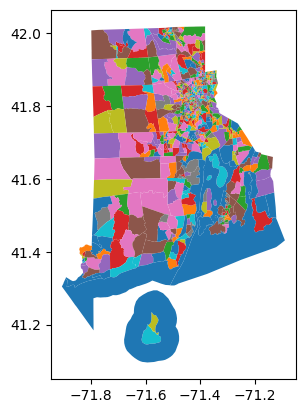

In [199]:
new_gdf.plot(column='B01001_001E')

In [200]:
new_gdf.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

In [201]:
new_gdf_wgs84_epsg4326 = new_gdf.to_crs(epsg=4326)

In [205]:
print(new_gdf_wgs84_epsg4326.dtypes)


B01001_001E      object
tract            object
block group      object
geometry       geometry
dtype: object


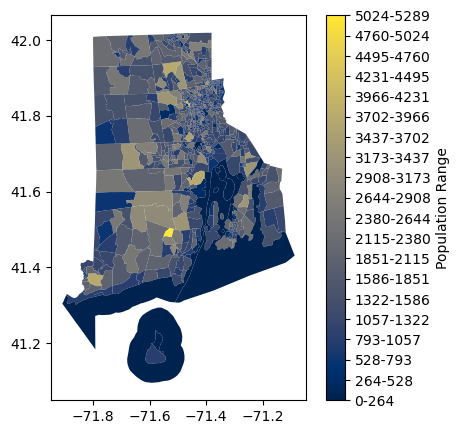

In [239]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

# Assuming new_gdf_wgs84_epsg4326 is already defined and is your GeoDataFrame
num_bins = 20  # Define the number of bins you want to create

# Ensure the data in 'B01001_001E' is numeric, converting any non-numeric values to NaN
new_gdf_wgs84_epsg4326['B01001_001E'] = pd.to_numeric(new_gdf_wgs84_epsg4326['B01001_001E'], errors='coerce')

# Create the bins based on the 'B01001_001E' column
new_gdf_wgs84_epsg4326['Binned_Data'] = pd.cut(new_gdf_wgs84_epsg4326['B01001_001E'], bins=num_bins, labels=False)

# Calculate bin edges to use in custom colorbar labels
bin_edges = np.linspace(new_gdf_wgs84_epsg4326['B01001_001E'].min(), new_gdf_wgs84_epsg4326['B01001_001E'].max(), num_bins+1)
# Create custom labels for each bin to display on the colorbar
bin_labels = [f"{int(bin_edges[i])}-{int(bin_edges[i+1])}" for i in range(len(bin_edges)-1)]

# Create a plot of the binned data
fig, ax = plt.subplots(figsize=(5,5))
new_gdf_wgs84_epsg4326.plot(column='Binned_Data', ax=ax, cmap='cividis')

# Create a ScalarMappable with the colormap and normalization instance
sm = plt.cm.ScalarMappable(cmap='cividis', norm=plt.Normalize(vmin=0, vmax=num_bins-1))
sm._A = []  # Some versions of matplotlib require setting the _A attribute to an empty list
# Create the colorbar using the figure and axes objects, with custom ticks and labels
cbar = fig.colorbar(sm, ax=ax, ticks=np.arange(num_bins), spacing='proportional')
cbar.set_ticklabels(bin_labels)
cbar.set_label('Population Range')

plt.show()


In [242]:
ri_towns_shp = ri_towns_shp.to_crs(new_gdf_wgs84_epsg4326.crs)
block_groups_with_town = gp.sjoin(new_gdf_wgs84_epsg4326, ri_towns_shp[['geometry', 'NAME']], how='left', predicate='intersects')
block_groups_with_town

B01001_001E   tract block group  \
0           1276  030100           1   
1            958  030100           2   
2           1234  030100           3   
2           1234  030100           3   
2           1234  030100           3   
..           ...     ...         ...   
789         1142  051504           4   
789         1142  051504           4   
789         1142  051504           4   
790            0  990100           0   
791            0  990200           0   

                                              geometry  Binned_Data  \
0    POLYGON ((-71.34223 41.75908, -71.34211 41.759...            4   
1    POLYGON ((-71.34147 41.74519, -71.34148 41.745...            3   
2    POLYGON ((-71.36521 41.73565, -71.36020 41.738...            4   
2    POLYGON ((-71.36521 41.73565, -71.36020 41.738...            4   
2    POLYGON ((-71.36521 41.73565, -71.36020 41.738...            4   
..                                                 ...          ...   
789  POLYGON ((-71.50685 41.40280, -71.50506 41.406...            4   
789  POLYGON ((-71.50685 41.40280, -71.50506 41.406...            4   
789  POLYGON ((-71.50685 41.40280, -71.50506 41.406...            4   
790  POLYGON ((-71.90722 41.30454, -71.90711 41.304...            0   
791  POLYGON ((-71.67881 41.15891, -71.67626 41.168...            0   

     index_right             NAME  
0           28.0       BARRINGTON  
1           28.0       BARRINGTON  
2           40.0       BARRINGTON  
2           28.0       BARRINGTON  
2           12.0  EAST PROVIDENCE  
..           ...              ...  
789        307.0     NARRAGANSETT  
789        300.0     NARRAGANSETT  
789        113.0  SOUTH KINGSTOWN  
790          NaN              NaN  
791          NaN              NaN  

[1532 rows x 7 columns]

In [275]:
import folium
import geopandas as gpd
import pandas as pd
import branca.colormap as cm
from branca.element import Figure

# Prepare your block group data
new_gdf_wgs84_epsg4326['B01001_001E'] = pd.to_numeric(new_gdf_wgs84_epsg4326['B01001_001E'], errors='coerce')
min_pop = new_gdf_wgs84_epsg4326['B01001_001E'].min()
max_pop = new_gdf_wgs84_epsg4326['B01001_001E'].max()

# Define the colormap
# colormap = cm.linear.viridis.scale(min_pop, max_pop)
colormap.caption = 'Population'
colormap = branca.colormap.LinearColormap(['green','blue'],vmin=min_pop,vmax=max_pop)


# Perform the spatial join to attach town names to block groups
# Ensure that both GeoDataFrames are using the same CRS
ri_towns_shp = ri_towns_shp.to_crs(new_gdf_wgs84_epsg4326.crs)
block_groups_with_towns = gpd.sjoin(new_gdf_wgs84_epsg4326, ri_towns_shp[['geometry', 'NAME']], how='left', predicate='intersects')

# Map setup
m = folium.Map(location=[41.6, -71.5], zoom_start=9.5)
colormap.add_to(m)

# Feature groups
block_group_layer = folium.FeatureGroup(name='Block Groups')
town_layer = folium.FeatureGroup(name='Towns')

# Add block groups to the map with town names in the tooltip
for idr, r in block_groups_with_towns.iterrows():
    folium.GeoJson(
        data=gpd.GeoSeries(r['geometry']).simplify(tolerance=0.0001).to_json(),
        style_function=lambda feature, pop=r['B01001_001E']: {
            'fillColor': colormap(pop),
            'color': 'black',
            'weight': 1,
            'fillOpacity': 0.7
        },
        tooltip=f"Population: {r['B01001_001E']}<br>Tract Number: {r['tract']}<br>Town: {r['NAME']}<br>Block Group #: {r['block group']}"
    ).add_to(block_group_layer)

# Add towns to the map
for idr, r in ri_towns_shp.iterrows():
    folium.GeoJson(
        data=gpd.GeoSeries(r['geometry']).simplify(tolerance=0.0001).to_json(),
        style_function=lambda x: {
            'fillColor': 'orange',
            'color': 'red',
            'weight': 2,
            'fillOpacity': 0.2
        },
        tooltip=f"Town: {r['NAME']}"
    ).add_to(town_layer)

# Add feature groups to the map
block_group_layer.add_to(m)
town_layer.add_to(m)

# Add Layer Control
folium.LayerControl().add_to(m)

# Configure and display the map in a larger figure
fig = Figure(width=1200, height=1000)
fig.add_child(m)
fig

In [276]:
# Replace 'YOUR_API_KEY' with your actual Census API key.
# Set up the request URL for the American Community Survey 5-Year Data


'''
found url here

https://api.census.gov/data/2022/acs/acs5/examples.html


'''
url = f'https://api.census.gov/data/2021/acs/acs5?get=NAME,B01001_001E&for=block%20group:*&in=state:44&in=county:*&in=tract:*&key={API_KEY}'

response2021 = requests.get(url)

data2021 = response2021.json()

# Convert to DataFrame, setting the first row as header
pop_data2021 = gp.GeoDataFrame(data[1:], columns=data[0])
# pop_data1 = pop_data1.sort_values(by='tract')

In [277]:
pop_data2021

NAME B01001_001E state  \
0    Block Group 1; Census Tract 301; Bristol Count...        1276    44   
1    Block Group 2; Census Tract 301; Bristol Count...         958    44   
2    Block Group 3; Census Tract 301; Bristol Count...        1234    44   
3    Block Group 4; Census Tract 301; Bristol Count...        1300    44   
4    Block Group 1; Census Tract 302; Bristol Count...         865    44   
..                                                 ...         ...   ...   
787  Block Group 2; Census Tract 515.04; Washington...        1598    44   
788  Block Group 3; Census Tract 515.04; Washington...         887    44   
789  Block Group 4; Census Tract 515.04; Washington...        1142    44   
790  Block Group 0; Census Tract 9901; Washington C...           0    44   
791  Block Group 0; Census Tract 9902; Washington C...           0    44   

    county   tract block group  
0      001  030100           1  
1      001  030100           2  
2      001  030100           3  
3      001  030100           4  
4      001  030200           1  
..     ...     ...         ...  
787    009  051504           2  
788    009  051504           3  
789    009  051504           4  
790    009  990100           0  
791    009  990200           0  

[792 rows x 6 columns]

In [279]:
response2021

<Response [200]>

In [281]:
from datetime import datetime

# Set the current year
current_year = datetime.now().year

# Initialize an empty dictionary to store the data for each year
pop_data = {}

# Loop through each year from 2005 to the current year
for year in range(2013, current_year + 1):
    # Construct the URL with the current year
    url = f'https://api.census.gov/data/{year}/acs/acs5?get=NAME,B01001_001E&for=block%20group:*&in=state:44&in=county:*&in=tract:*&key={API_KEY}'

    # Make the API request
    response = requests.get(url)

    # Check if the response was successful
    if response.status_code == 200:
        # If successful, convert the JSON response into a GeoDataFrame
        data = response.json()
        pop_data[year] = gp.GeoDataFrame(data[1:], columns=data[0])
        print(f"Data successfully retrieved for the year {year}.")
    else:
        # If the request was unsuccessful, print an error message
        print(f"Failed to retrieve data for the year {year}. Status code: {response.status_code}")

Data successfully retrieved for the year 2013.
Data successfully retrieved for the year 2014.
Data successfully retrieved for the year 2015.
Data successfully retrieved for the year 2016.
Data successfully retrieved for the year 2017.
Data successfully retrieved for the year 2018.
Data successfully retrieved for the year 2019.
Data successfully retrieved for the year 2020.
Data successfully retrieved for the year 2021.
Data successfully retrieved for the year 2022.
Failed to retrieve data for the year 2023. Status code: 404
Failed to retrieve data for the year 2024. Status code: 404


In [2]:
import geopandas as gp

nhgis_test = gp.read_file('./nhgis0001_shape/nhgis0001_shapefile_tl2010_440_blck_grp_2010/RI_blck_grp_2010.shp')
nhgis_test

STATEFP10 COUNTYFP10 TRACTCE10 BLKGRPCE10       GEOID10     NAMELSAD10  \
0          44        009    051202          4  440090512024  Block Group 4   
1          44        009    051504          3  440090515043  Block Group 3   
2          44        003    020400          3  440030204003  Block Group 3   
3          44        003    020400          1  440030204001  Block Group 1   
4          44        003    020702          2  440030207022  Block Group 2   
..        ...        ...       ...        ...           ...            ...   
807        44        007    011701          3  440070117013  Block Group 3   
808        44        007    002900          3  440070029003  Block Group 3   
809        44        007    016600          1  440070166001  Block Group 1   
810        44        007    002900          5  440070029005  Block Group 5   
811        44        007    003300          4  440070033004  Block Group 4   

    MTFCC10 FUNCSTAT10   ALAND10  AWATER10   INTPTLAT10    INTPTLON10  \
0     G5030          S   3994067     30018  +41.4491232  -071.4849658   
1     G5030          S   2107869   1866790  +41.3879335  -071.5024140   
2     G5030          S    837858         0  +41.7264077  -071.5287198   
3     G5030          S    380061         0  +41.7267397  -071.5202772   
4     G5030          S  34969487   1756351  +41.6882939  -071.6653675   
..      ...        ...       ...       ...          ...           ...   
807   G5030          S   2155054     27068  +41.9129783  -071.4264654   
808   G5030          S    297816         0  +41.8513569  -071.4164574   
809   G5030          S    738932    183659  +41.8666924  -071.3821405   
810   G5030          S    519332     56071  +41.8543489  -071.4252935   
811   G5030          S   1068943      3129  +41.8483931  -071.4075318   

             GISJOIN    Shape_area     Shape_len  \
0    G44000900512024  4.024083e+06  10071.005105   
1    G44000900515043  3.974654e+06   8648.490949   
2    G44000300204003  8.378592e+05   4015.808025   
3    G44000300204001  3.800624e+05   2609.861718   
4    G44000300207022  3.672584e+07  28286.600216   
..               ...           ...           ...   
807  G44000700117013  2.182121e+06   6600.848670   
808  G44000700029003  2.978149e+05   2131.601150   
809  G44000700166001  7.389329e+05   5044.594930   
810  G44000700029005  5.754035e+05   3324.272765   
811  G44000700033004  1.072070e+06   5541.851401   

                                              geometry  
0    POLYGON ((2011277.667 702310.117, 2011234.902 ...  
1    POLYGON ((2011918.366 697067.323, 2011905.151 ...  
2    POLYGON ((1999100.346 732136.915, 1999096.499 ...  
3    POLYGON ((1999803.943 732377.464, 1999770.696 ...  
4    POLYGON ((1989634.266 729802.688, 1989618.306 ...  
..                                                 ...  
807  POLYGON ((2002868.602 753806.053, 2002848.433 ...  
808  POLYGON ((2004409.176 747832.173, 2004351.097 ...  
809  POLYGON ((2006968.763 749590.335, 2006621.340 ...  
810  POLYGON ((2003468.113 749005.514, 2003485.183 ...  
811  POLYGON ((2005782.819 748763.168, 2005800.701 ...  

[812 rows x 16 columns]

<Axes: >

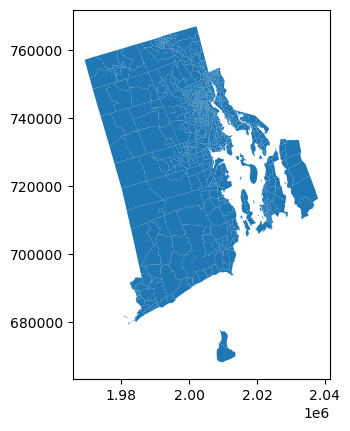

In [3]:
nhgis_test.plot()